In [3]:
import tushare as ts
from time import time, sleep
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.metrics import recall_score, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from pymongo import MongoClient, ASCENDING, DESCENDING
from vnpy.trade_stock_digu.data_service import DataServiceTushare, LOG

In [10]:
arr = np.array([[2,20,200,1], [3,30,300,1], [4, 40,400,1]])

In [11]:
arr

array([[  2,  20, 200,   1],
       [  3,  30, 300,   1],
       [  4,  40, 400,   1]])

In [20]:
arr[:,3] - arr[:,0]

array([-1, -2, -3])

In [26]:
np.vstack((arr[:,3] - arr[:,0], arr[:,3] - arr[:,1]))

array([[ -1,  -2,  -3],
       [-19, -29, -39]])

In [28]:
l1 = [1,2,3]
l2=[2,3,4]
arr = np.array([l1, l2])

In [29]:
arr

array([[1, 2, 3],
       [2, 3, 4]])

In [39]:
ds_tushare = DataServiceTushare()

sklearn.utils.Bunch

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import recall_score, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from pymongo import MongoClient, ASCENDING, DESCENDING
from vnpy.trade_stock_digu.data_service import DataServiceTushare, LOG

if __name__ == "__main__":    
    ds_tushare = DataServiceTushare()    
    lst_stock = ds_tushare.get_stock_list()   
    lst_ma5 = list()
    lst_ma10 = list()
    lst_close = list()
    lst_pct_chg = list()
    for item_stock in lst_stock:
        lst_price_code = ds_tushare.get_stock_price_lst(item_stock, '20190101', '20190701')
        if len(lst_price_code) == 0:
            continue
        lst_pct_chg_code = list()
        for item_price in lst_price_code:
            lst_ma5.append(item_price['ma_5'])
            lst_ma10.append(item_price['ma_10'])
            lst_close.append(item_price['close'])
            lst_pct_chg_code.append(item_price['pct_chg'])   
        arr_pct_chg_code = np.array(lst_pct_chg_code)
        arr_pct_chg_code = np.roll(arr_pct_chg_code, -1)
        arr_pct_chg_code = (arr_pct_chg_code > 0.0).astype(int)
        lst_ma5.pop()
        lst_ma10.pop()
        lst_close.pop()
        try:
            arr_pct_chg_code = np.delete(arr_pct_chg_code, -1)
        except:
            LOG.info(arr_pct_chg_code)
        lst_pct_chg += list(arr_pct_chg_code)        
    arr_ma5 = np.array(lst_ma5)
    arr_ma10 = np.array(lst_ma10)
    arr_close = np.array(lst_close)    
    arr_ma5_sub_close = arr_close - arr_ma5
    arr_ma10_sub_close = arr_close - arr_ma10
    arr_pct_chg = np.array(lst_pct_chg)
    X = np.hstack((arr_ma5, arr_ma10))
    y = arr_pct_chg
    

In [3]:
X.shape

(840452,)

In [4]:
y.shape

(420226,)

In [5]:
arr_ma5

array([9.04538, 9.03372, 9.12128, ..., 5.72932, 5.73528, 5.70122])

In [6]:
arr_ma10

array([9.25455, 9.17283, 9.15435, ..., 5.62513, 5.64597, 5.65474])

In [7]:
np.size(arr_ma5)


420226

In [8]:
X = np.vstack((arr_ma5, arr_ma10))

In [9]:
X.shape

(2, 420226)

In [10]:
X

array([[9.04538, 9.03372, 9.12128, ..., 5.72932, 5.73528, 5.70122],
       [9.25455, 9.17283, 9.15435, ..., 5.62513, 5.64597, 5.65474]])

In [11]:
X.T

array([[9.04538, 9.25455],
       [9.03372, 9.17283],
       [9.12128, 9.15435],
       ...,
       [5.72932, 5.62513],
       [5.73528, 5.64597],
       [5.70122, 5.65474]])

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import recall_score, confusion_matrix, precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from pymongo import MongoClient, ASCENDING, DESCENDING
from vnpy.trade_stock_digu.data_service import DataServiceTushare, LOG

ds_tushare = DataServiceTushare()    
lst_stock = ds_tushare.get_stock_list()   
lst_ma5 = list()
lst_ma10 = list()
lst_ma20 = list()
lst_ma30 = list()
lst_ma60 = list()
lst_ma120 = list()
lst_close = list()
lst_pct_chg = list()
for item_stock in lst_stock:
# for item_stock in ['000001_SZ', '000002_SZ', '000813_SZ']:
    lst_price_code = ds_tushare.get_stock_price_lst(item_stock, '20190101', '20190701')
    # lst_price_code = ds_tushare.get_stock_price_lst(item_stock, '20200805', '20200808')
    if len(lst_price_code) == 0:
        continue
    lst_pct_chg_code = list()
    for item_price in lst_price_code:
        lst_ma5.append(item_price['ma_5'])
        lst_ma10.append(item_price['ma_10'])
        lst_ma20.append(item_price['ma_20'])
        lst_ma30.append(item_price['ma_30'])
        lst_ma60.append(item_price['ma_60'])
        lst_ma120.append(item_price['ma_120'])
        lst_close.append(item_price['close'])
        lst_pct_chg_code.append(item_price['pct_chg'])   
    arr_pct_chg_code = np.array(lst_pct_chg_code)
    arr_pct_chg_code = np.roll(arr_pct_chg_code, -1)
    arr_pct_chg_code = (arr_pct_chg_code > 0.0).astype(int)
    lst_ma5.pop()
    lst_ma10.pop()
    lst_ma20.pop()
    lst_ma30.pop()
    lst_ma60.pop()
    lst_ma120.pop()
    lst_close.pop()
    try:
        arr_pct_chg_code = np.delete(arr_pct_chg_code, -1)
    except:
        LOG.info(arr_pct_chg_code)
    lst_pct_chg += list(arr_pct_chg_code)        
arr_ma5 = np.array(lst_ma5)
arr_ma10 = np.array(lst_ma10)
arr_ma20 = np.array(lst_ma20)
arr_ma30 = np.array(lst_ma30)
arr_ma60 = np.array(lst_ma60)
arr_ma120 = np.array(lst_ma120)
arr_close = np.array(lst_close)    
arr_ma5_sub_close = (arr_close - arr_ma5)*100/arr_close
arr_ma10_sub_close = (arr_close - arr_ma10)*100/arr_close
arr_ma20_sub_close = (arr_close - arr_ma20)*100/arr_close
arr_ma30_sub_close = (arr_close - arr_ma30)*100/arr_close
arr_ma60_sub_close = (arr_close - arr_ma60)*100/arr_close
arr_ma120_sub_close = (arr_close - arr_ma120)*100/arr_close
arr_pct_chg = np.array(lst_pct_chg)
X = np.vstack((arr_ma5_sub_close, arr_ma10_sub_close, arr_ma20_sub_close, arr_ma30_sub_close, arr_ma60_sub_close, arr_ma120_sub_close))
y = arr_pct_chg
y_close = arr_close


In [2]:
X.shape

(6, 420226)

In [3]:
y.shape

(420226,)

In [4]:
X = X.T

In [5]:
X.shape

(420226, 6)

In [63]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc, X, y, cv=10).mean()
score_pre

0.5121482179258061

In [6]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=90)
    score = cross_val_score(rfc, X, y, cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.5768300695535877 191


NameError: name 'plt' is not defined

0.5768300695535877 191


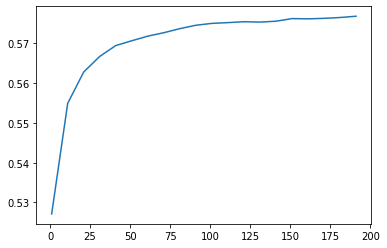

In [10]:
import matplotlib.pyplot as plt
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure()
plt.plot(range(1,201,10),scorel)
plt.show()

In [11]:
param_grid = {'max_depth':np.arange(1, 20, 5)}
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X,y)
GS.best_params_
GS.best_score_

0.5837858547839092

In [12]:
GS.best_params_

{'max_depth': 16}

In [14]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90,max_depth=16)

In [15]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=16, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=90, verbose=0,
                       warm_start=False)

In [24]:
def get_ml_X(close, ma5, ma10, ma20, ma30, ma60, ma120):
    arr = np.array([close-ma5, close-ma10, close-ma20, close-ma30, close-ma60, close-ma120])
    return arr.reshape(-1, 1).T

In [29]:
hsjt = get_ml_X(6.24, 6.1, 6.05, 6.33, 6.53, 6.37, 5.83)

In [30]:
hsjt.shape

(1, 6)

In [32]:
rfc.predict(hsjt)

array([1])

In [33]:
rfc.predict_proba(hsjt)

array([[0.49348943, 0.50651057]])

In [34]:
cckj = get_ml_X(29.82, 30.68, 30.25, 30.60, 31.4, 30.05, 28.47)

In [35]:
rfc.predict(cckj)

array([1])

In [36]:
rfc.predict_proba(cckj)

array([[0.49954301, 0.50045699]])

In [37]:
bbcm = get_ml_X(3.92, 4.02, 3.85, 3.77, 3.74, 3.65, 3.73)

In [38]:
rfc.predict(bbcm)

array([0])

In [39]:
rfc.predict_proba(bbcm)

array([[0.51973754, 0.48026246]])

In [40]:
def get_ml_X_db(code, date):
    k_data = ds_tushare.get_stock_price_info(code, date)
    arr = np.array([k_data['close']-k_data['ma_5'], k_data['close']-k_data['ma_10'], k_data['close']-k_data['ma_20'], k_data['close']-k_data['ma_30'], \
        k_data['close']-k_data['ma_60'], k_data['close']-k_data['ma_120']])
    return arr.reshape(-1, 1).T

In [41]:
bbcm = get_ml_X_db('600386_SH', '20200810')

In [42]:
rfc.predict(bbcm)

array([0])

In [43]:
rfc.predict_proba(bbcm)

array([[0.51973754, 0.48026246]])